In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Mounted at /content/drive/


In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')

CPU times: user 154 ms, sys: 42.8 ms, total: 196 ms
Wall time: 4.03 s


In [ ]:
datos.shape

(10532, 3)

In [ ]:
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 2.71 s, sys: 86.7 ms, total: 2.79 s
Wall time: 2.84 s


In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 993 ms, sys: 58.3 ms, total: 1.05 s
Wall time: 1.08 s


In [ ]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.222675,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219218,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.236632,0.229117,0.0,0.0,0.2513,0.228164,0.0,0.000000,0.0,0.0,0.227667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.076446,0.079665,0.0,0.000000,0.081513,0.000000,0.0,0.0,0.176793,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.079950,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.083243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.124332,0.0,0.0,0.0,0.0,0.000000,0.373933,0.0,0.000000,0.000000,0.131083,0.0,0.0,0.000000,0.0,0.0,0.0,0.122401,0.0,0.0,0.000000,0.000000,0.0,0.138164,0.0,0.000000,0.0,0.0,0.000000,0.127929,0.0,0.0,0.0000,0.000000,0.0,0.136046,0.0,0.0,0.127119,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,0.406349,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.214207,0.0,0.0,0.000000,0.0,0.0,0.0,0.200019,0.0,0.0,0.213077,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.215909,0.209052,0.0,0.0,0.0000,0.208182,0.0,0.000000,0.0,0.0,0.207729,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10528,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,0.000000,0.0,0.0,0.0,0.0,0.207926,0.000000,0.0,0.228613,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.217457,0.0,0.000000,0.0,0.501412,0.0,0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
max_depths = np.arange(10,110,10)
for max_depth in max_depths:
    print("max_depth:",max_depth)
    knn = DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

max_depth: 10
Train:
[[ 709    8   13  234 1275]
 [   4 1258  153   19  279]
 [  19   47 1075   55  418]
 [  19    0   13  573  936]
 [   5    0    2  178 1133]]
              precision    recall  f1-score   support

           0       0.94      0.32      0.47      2239
           1       0.96      0.73      0.83      1713
           2       0.86      0.67      0.75      1614
           3       0.54      0.37      0.44      1541
           4       0.28      0.86      0.42      1318

    accuracy                           0.56      8425
   macro avg       0.71      0.59      0.58      8425
weighted avg       0.75      0.56      0.59      8425

Test:
[[156   3   8  67 313]
 [  2 332  48   6  67]
 [  5  15 258  14 105]
 [  6   0   5 157 221]
 [  2   0   0  45 272]]
              precision    recall  f1-score   support

           0       0.91      0.29      0.43       547
           1       0.95      0.73      0.82       455
           2       0.81      0.65      0.72       397
          

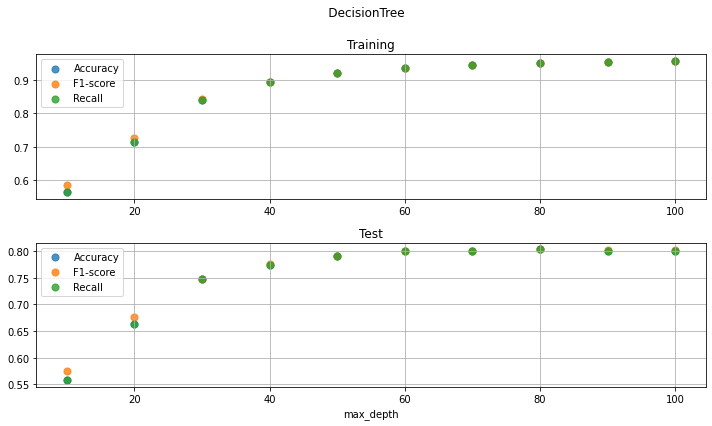

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,6),tight_layout=True)
fig.suptitle("     DecisionTree")
ax[0].scatter(max_depths,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(max_depths,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(max_depths,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')
# ax[0].set_xlabel('max_depth')

ax[1].scatter(max_depths,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(max_depths,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(max_depths,recall_test,s=50,alpha=0.8, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('max_depth')

plt.show()